Import Libraries

In [ ]:
# Basic data handling
import numpy as np
import pandas as pd

# Text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Train-test split
from sklearn.model_selection import train_test_split

# Machine learning model
from sklearn.naive_bayes import BernoulliNB

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')   # optional but useful for tokenization

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Upload the ZIP File in Colab

In [ ]:
df = pd.read_csv('/content/Yelp Restaurant Reviews.csv.zip')

In [ ]:
import zipfile

zip_path = "/content/Yelp Restaurant Reviews.csv.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall('/content')
    print("Files extracted:", z.namelist())


Files extracted: ['Yelp Restaurant Reviews.csv']


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Yelp Restaurant Reviews.csv')
df.head()


Yelp URL  Rating       Date  \
0  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  1/22/2022   
1  https://www.yelp.com/biz/sidney-dairy-barn-sidney       4  6/26/2022   
2  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5   8/7/2021   
3  https://www.yelp.com/biz/sidney-dairy-barn-sidney       4  7/28/2016   
4  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  6/23/2015   

                                         Review Text  
0  All I can say is they have very good ice cream...  
1  Nice little local place for ice cream.My favor...  
2  A delicious treat on a hot day! Staff was very...  
3  This was great service and a fun crew! I got t...  
4  This is one of my favorite places to get ice c...

Rename Column

In [ ]:
df = df.rename(columns={
    'Yelp URL': 'Url'
})

df.head()


Url  Rating       Date  \
0  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  1/22/2022   
1  https://www.yelp.com/biz/sidney-dairy-barn-sidney       4  6/26/2022   
2  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5   8/7/2021   
3  https://www.yelp.com/biz/sidney-dairy-barn-sidney       4  7/28/2016   
4  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  6/23/2015   

                                         Review Text  
0  All I can say is they have very good ice cream...  
1  Nice little local place for ice cream.My favor...  
2  A delicious treat on a hot day! Staff was very...  
3  This was great service and a fun crew! I got t...  
4  This is one of my favorite places to get ice c...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Url          19896 non-null  object
 1   Rating       19896 non-null  int64 
 2   Date         19896 non-null  object
 3   Review Text  19896 non-null  object
dtypes: int64(1), object(3)
memory usage: 621.9+ KB


In [ ]:
df.shape

(19896, 4)

In [ ]:
df['Rating'].describe()

rating
count  19896.000000
mean       4.130830
std        1.200746
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

Check if ANY null values exist

In [ ]:
df.isnull().sum()


Url            0
Rating         0
Date           0
Review Text    0
dtype: int64

In [ ]:
df['Url'].unique()


array(['https://www.yelp.com/biz/sidney-dairy-barn-sidney',
       'https://www.yelp.com/biz/rewind-ice-cream-boba-tea-chandler-3',
       'https://www.yelp.com/biz/carlos-bakery-las-vegas-3',
       'https://www.yelp.com/biz/the-vegan-doughnut-company-lakewood-3',
       'https://www.yelp.com/biz/the-butterwood-bake-consortium-pittsburgh',
       'https://www.yelp.com/biz/handels-homemade-ice-cream-and-yogurt-las-vegas-3',
       'https://www.yelp.com/biz/am%C3%A9lies-french-bakery-and-caf%C3%A9-charlotte-11',
       'https://www.yelp.com/biz/bouchon-bakery-las-vegas-10',
       'https://www.yelp.com/biz/novel-ice-cream-phoenix',
       'https://www.yelp.com/biz/sweet-republic-scottsdale-2',
       'https://www.yelp.com/biz/sprinkles-las-vegas-las-vegas',
       'https://www.yelp.com/biz/fatty-daddys-scottsdale-5',
       'https://www.yelp.com/biz/85-c-bakery-cafe-las-vegas-2',
       'https://www.yelp.com/biz/melt-phoenix',
       'https://www.yelp.com/biz/jack-frost-donuts-cleveland

In [ ]:
df['Date'].unique()



array(['1/22/2022', '6/26/2022', '8/7/2021', ..., '1/26/2021', '8/7/2020',
       '12/11/2017'], dtype=object)

In [ ]:
df['Review Text'].unique()

array(['All I can say is they have very good ice cream I would for sure recommend their cookies and creme ice cream it is very good',
       'Nice little local place for ice cream.My favorite is their pumpkin shake ( Fall season special).( My Sweetness tolerance is low) Their LARGE SIZE ice cream usually seems too sweet after having ice cream for a while. But love their pina colada. So refreshing. Their Banana Split is good too.',
       'A delicious treat on a hot day! Staff was very friendly and helpful-- gave us a sample and let us order a little earlier than open.',
       ...,
       'Line was about 25 people long. It went fast! They have a variety of pastries and desserts to choose from. We got a tiramisu where the mascarpone tasted great. Creamy and just the right amount of sweetness. Got another dessert with chocolate ball over a cookie - toddler approved. The coffee was good. They serve lavazza coffee, fyi for coffee connoisseurs.',
       'Its hard not to order everything whe

In [27]:
df['Review Text'] = df['Review Text'].replace("ice cream", "icecream", regex=True)

/tmp/ipython-input-7688388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Text'] = df['Review Text'].replace("ice cream", "icecream", regex=True)


In [ ]:
df['Review Text'].unique()

array(['All I can say is they have very good icecream I would for sure recommend their cookies and creme icecream it is very good',
       'Nice little local place for icecream.My favorite is their pumpkin shake ( Fall season special).( My Sweetness tolerance is low) Their LARGE SIZE icecream usually seems too sweet after having icecream for a while. But love their pina colada. So refreshing. Their Banana Split is good too.',
       'A delicious treat on a hot day! Staff was very friendly and helpful-- gave us a sample and let us order a little earlier than open.',
       ...,
       'Line was about 25 people long. It went fast! They have a variety of pastries and desserts to choose from. We got a tiramisu where the mascarpone tasted great. Creamy and just the right amount of sweetness. Got another dessert with chocolate ball over a cookie - toddler approved. The coffee was good. They serve lavazza coffee, fyi for coffee connoisseurs.',
       'Its hard not to order everything when I c

In [28]:
df.head()

Url  Rating       Date  \
0  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  1/22/2022   
1  https://www.yelp.com/biz/sidney-dairy-barn-sidney       4  6/26/2022   
2  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5   8/7/2021   
3  https://www.yelp.com/biz/sidney-dairy-barn-sidney       4  7/28/2016   
4  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  6/23/2015   

                                         Review Text  Label  
0  All I can say is they have very good icecream ...      1  
1  Nice little local place for icecream.My favori...      1  
2  A delicious treat on a hot day! Staff was very...      1  
3  This was great service and a fun crew! I got t...      1  
4  This is one of my favorite places to get icecr...      1

Create Labels (Liked / Not Liked)

In [29]:
def map_rating(r):
    if r >= 4:
        return 1
    elif r <= 2:
        return 0
    else:
        return None     # Neutral (3 stars), ignore

df['Label'] = df['Rating'].apply(map_rating)

df = df.dropna(subset=['Label'])
df['Label'] = df['Label'].astype(int)

df.head()

/tmp/ipython-input-362837334.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = df['Rating'].apply(map_rating)


Url  Rating       Date  \
0  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  1/22/2022   
1  https://www.yelp.com/biz/sidney-dairy-barn-sidney       4  6/26/2022   
2  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5   8/7/2021   
3  https://www.yelp.com/biz/sidney-dairy-barn-sidney       4  7/28/2016   
4  https://www.yelp.com/biz/sidney-dairy-barn-sidney       5  6/23/2015   

                                         Review Text  Label  
0  All I can say is they have very good icecream ...      1  
1  Nice little local place for icecream.My favori...      1  
2  A delicious treat on a hot day! Staff was very...      1  
3  This was great service and a fun crew! I got t...      1  
4  This is one of my favorite places to get icecr...      1

In [30]:
df.head(100)

Url  Rating        Date  \
0    https://www.yelp.com/biz/sidney-dairy-barn-sidney       5   1/22/2022   
1    https://www.yelp.com/biz/sidney-dairy-barn-sidney       4   6/26/2022   
2    https://www.yelp.com/biz/sidney-dairy-barn-sidney       5    8/7/2021   
3    https://www.yelp.com/biz/sidney-dairy-barn-sidney       4   7/28/2016   
4    https://www.yelp.com/biz/sidney-dairy-barn-sidney       5   6/23/2015   
..                                                 ...     ...         ...   
107  https://www.yelp.com/biz/rewind-ice-cream-boba...       5   10/1/2018   
108  https://www.yelp.com/biz/rewind-ice-cream-boba...       5   9/16/2018   
109  https://www.yelp.com/biz/rewind-ice-cream-boba...       5  11/14/2020   
110  https://www.yelp.com/biz/rewind-ice-cream-boba...       5   4/15/2021   
113  https://www.yelp.com/biz/rewind-ice-cream-boba...       5   1/28/2019   

                                           Review Text  Label  
0    All I can say is they have very good icecream ...      1  
1    Nice little local place for icecream.My favori...      1  
2    A delicious treat on a hot day! Staff was very...      1  
3    This was great service and a fun crew! I got t...      1  
4    This is one of my favorite places to get icecr...      1  
..                                                 ...    ...  
107  We absolutely love this place! I would drive a...      1  
108  Came here during their soft opening and the ic...      1  
109  Oooohhh. THIS place is so very good. I love ic...      1  
110  I came into this evening for some icecream and...      1  
113  Super happy to have finally given this place a...      1  

[100 rows x 5 columns]

Apply Preprocessing to Entire Dataset

In [31]:
ps = PorterStemmer()
stop_words = stopwords.words('english')

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)     # remove non letters
    text = text.lower()                       # lowercase
    words = text.split()                      # tokenize
    words = [ps.stem(w) for w in words if w not in stop_words]  # stem + stopwords remove
    return " ".join(words)

# Apply preprocessing to all reviews
corpus = []

for review in df['Review Text']:   # using renamed column
    cleaned = preprocess_text(review)
    corpus.append(cleaned)

# Print each cleaned review with one blank line
for review in corpus:
    print(review)
    print()

say good icecream would sure recommend cooki creme icecream good

nice littl local place icecream favorit pumpkin shake fall season special sweet toler low larg size icecream usual seem sweet icecream love pina colada refresh banana split good

delici treat hot day staff friendli help gave us sampl let us order littl earlier open

great servic fun crew got banana cream pie chocol icecream love flavor freshli cut banana graham cracker chocol icecream yum thing notic melt pretti fast bit ici like creamier icecream bit overrun prefer overal delici

one favorit place get icecream cu area bit drive worth minut far side urbana get realli easi atmospher dairi barn kid friendli mani tabl set sit enjoy icecream friend went line minut wait seem like time older gentlemen presum manag owner give sampl entir line could tell took pride product made excit share everyon special night cappuccino icecream ad cooki dough make tornado blizzard like icecream treat quit refresh nice treat humid night dairi 

TF-IDF Vectorization

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(corpus).toarray()

y = df['Label']   # target labels


Train-Test Split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

pred_lr = model_lr.predict(X_test)


Linear SVM

In [36]:
from sklearn.svm import LinearSVC

model_svm = LinearSVC()
model_svm.fit(X_train, y_train)

pred_svm = model_svm.predict(X_test)


Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=200, random_state=42)
model_rf.fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)


Bernoulli Naive Bayes

In [38]:
from sklearn.naive_bayes import BernoulliNB

model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)

pred_nb = model_nb.predict(X_test)


Accuracy Comparison

In [39]:
from sklearn.metrics import accuracy_score

acc_lr  = accuracy_score(y_test, pred_lr)
acc_svm = accuracy_score(y_test, pred_svm)
acc_rf  = accuracy_score(y_test, pred_rf)
acc_nb  = accuracy_score(y_test, pred_nb)

print("Logistic Regression Accuracy :", acc_lr)
print("Linear SVM Accuracy          :", acc_svm)
print("Random Forest Accuracy       :", acc_rf)
print("Naive Bayes Accuracy         :", acc_nb)


Logistic Regression Accuracy : 0.943073471676949
Linear SVM Accuracy          : 0.9503645541222658
Random Forest Accuracy       : 0.9158721256309591
Naive Bayes Accuracy         : 0.9178351093662367


Accuracy Comparison of All Models

In [40]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Linear SVM', 'Random Forest', 'Naive Bayes']
accuracies = [acc_lr, acc_svm, acc_rf, acc_nb]

plt.figure(figsize=(10,5))
plt.bar(models, accuracies, color=['blue','green','orange','red'])
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Confusion Matrix for ALL Models

In [41]:
from sklearn.metrics import confusion_matrix

print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, pred_lr), "\n")
print("Linear SVM Confusion Matrix:\n", confusion_matrix(y_test, pred_svm), "\n")
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, pred_rf), "\n")
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, pred_nb), "\n")


Logistic Regression Confusion Matrix:
 [[ 317  179]
 [  24 3046]] 

Linear SVM Confusion Matrix:
 [[ 382  114]
 [  63 3007]] 

Random Forest Confusion Matrix:
 [[ 212  284]
 [  16 3054]] 

Naive Bayes Confusion Matrix:
 [[ 378  118]
 [ 175 2895]] 



Heatmap – Confusion Matrix for Each Model
Linear Regression

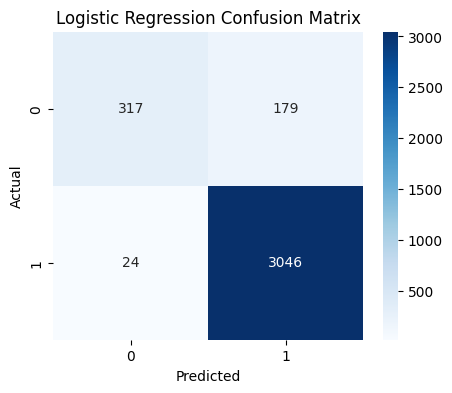

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Linear SVM Heatmap

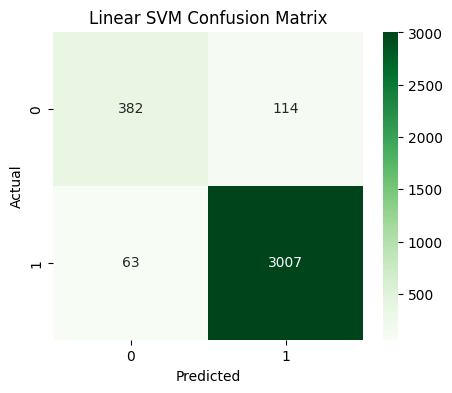

In [43]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, pred_svm), annot=True, fmt="d", cmap="Greens")
plt.title("Linear SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest Heatmap

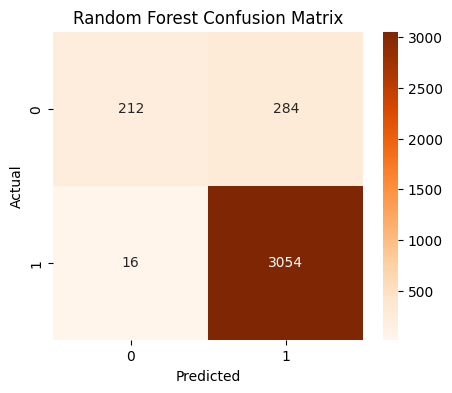

In [44]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True, fmt="d", cmap="Oranges")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Naive Bayes Heatmap

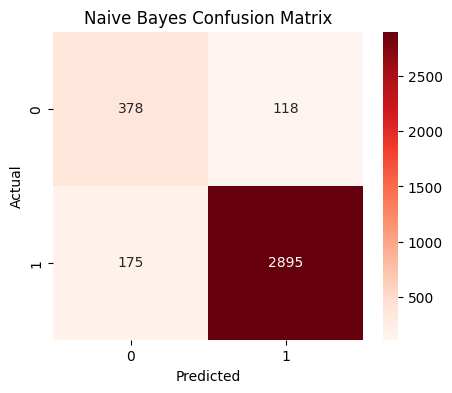

In [45]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, pred_nb), annot=True, fmt="d", cmap="Reds")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classification Report (Precision, Recall, F1)

In [46]:
from sklearn.metrics import classification_report

print("Logistic Regression Report:\n")
print(classification_report(y_test, pred_lr))

print("Linear SVM Report:\n")
print(classification_report(y_test, pred_svm))

print("Random Forest Report:\n")
print(classification_report(y_test, pred_rf))

print("Naive Bayes Report:\n")
print(classification_report(y_test, pred_nb))


Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.93      0.64      0.76       496
           1       0.94      0.99      0.97      3070

    accuracy                           0.94      3566
   macro avg       0.94      0.82      0.86      3566
weighted avg       0.94      0.94      0.94      3566

Linear SVM Report:

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       496
           1       0.96      0.98      0.97      3070

    accuracy                           0.95      3566
   macro avg       0.91      0.87      0.89      3566
weighted avg       0.95      0.95      0.95      3566

Random Forest Report:

              precision    recall  f1-score   support

           0       0.93      0.43      0.59       496
           1       0.91      0.99      0.95      3070

    accuracy                           0.92      3566
   macro avg       0.92      0.71      0.77      3566
we

Precision + Recall + F1-Score Comparison

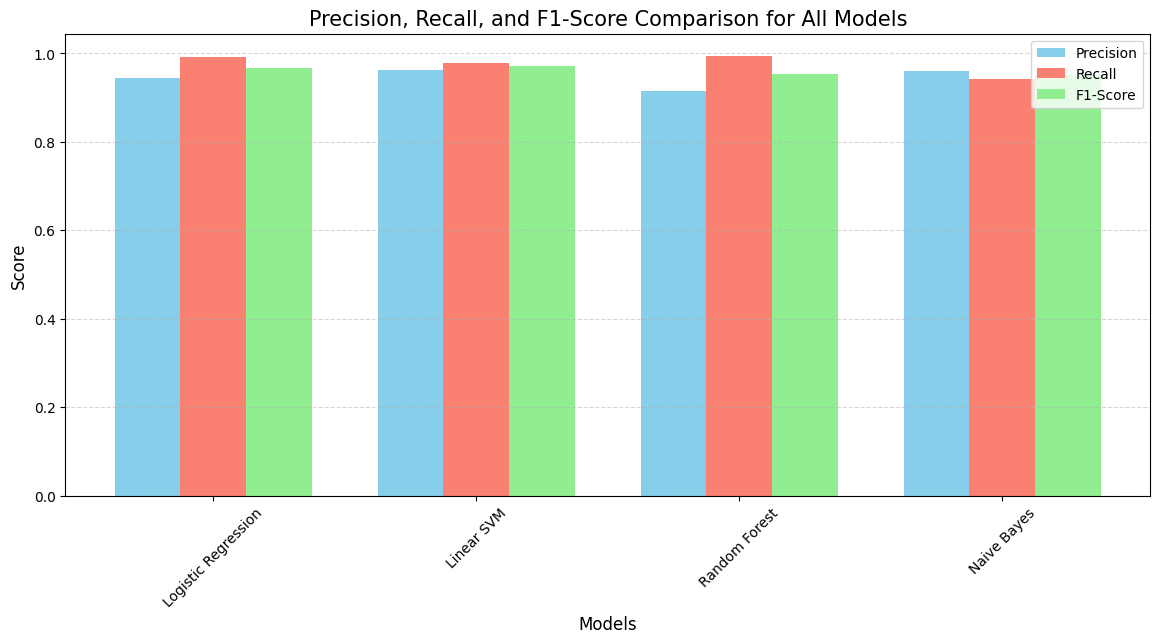

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Model names
models = ['Logistic Regression', 'Linear SVM', 'Random Forest', 'Naive Bayes']

# Precision values
precisions = [
    precision_score(y_test, pred_lr),
    precision_score(y_test, pred_svm),
    precision_score(y_test, pred_rf),
    precision_score(y_test, pred_nb)
]

# Recall values
recalls = [
    recall_score(y_test, pred_lr),
    recall_score(y_test, pred_svm),
    recall_score(y_test, pred_rf),
    recall_score(y_test, pred_nb)
]

# F1-score values
f1_scores = [
    f1_score(y_test, pred_lr),
    f1_score(y_test, pred_svm),
    f1_score(y_test, pred_rf),
    f1_score(y_test, pred_nb)
]

# X-axis index
x = np.arange(len(models))
width = 0.25   # width of each bar

plt.figure(figsize=(14,6))

# Plot bars
plt.bar(x - width, precisions, width, label='Precision', color='skyblue')
plt.bar(x, recalls, width, label='Recall', color='salmon')
plt.bar(x + width, f1_scores, width, label='F1-Score', color='lightgreen')

# Labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Precision, Recall, and F1-Score Comparison for All Models', fontsize=15)
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


Predict New Reviews Using ALL Models

In [48]:
def predict_review(text):
    # preprocess
    cleaned = preprocess_text(text)
    vec = tfidf.transform([cleaned]).toarray()

    print("\n--- Predictions ---")
    print("Logistic Regression :", model_lr.predict(vec)[0])
    print("Linear SVM          :", model_svm.predict(vec)[0])
    print("Random Forest       :", model_rf.predict(vec)[0])
    print("Naive Bayes         :", model_nb.predict(vec)[0])

# Test
predict_review("The food was amazing but the service was slow")



--- Predictions ---
Logistic Regression : 1
Linear SVM          : 1
Random Forest       : 1
Naive Bayes         : 1


COMPARISON (Accuracy, Precision, Recall, F1, Best Model)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a dictionary to store evaluation metrics
model_scores = {
    "Model": ["Logistic Regression", "Linear SVM", "Random Forest", "Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_test, pred_lr),
        accuracy_score(y_test, pred_svm),
        accuracy_score(y_test, pred_rf),
        accuracy_score(y_test, pred_nb)
    ],
    "Precision": [
        precision_score(y_test, pred_lr),
        precision_score(y_test, pred_svm),
        precision_score(y_test, pred_rf),
        precision_score(y_test, pred_nb)
    ],
    "Recall": [
        recall_score(y_test, pred_lr),
        recall_score(y_test, pred_svm),
        recall_score(y_test, pred_rf),
        recall_score(y_test, pred_nb)
    ],
    "F1-Score": [
        f1_score(y_test, pred_lr),
        f1_score(y_test, pred_svm),
        f1_score(y_test, pred_rf),
        f1_score(y_test, pred_nb)
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(model_scores)

# Display comparison table
print("MODEL PERFORMANCE COMPARISON:\n")
print(results_df)

# Find best model based on F1-score
best_model_index = results_df["F1-Score"].idxmax()
best_model_name = results_df.loc[best_model_index, "Model"]

print("\n BEST MODEL BASED ON F1-SCORE:")
print(best_model_name)


MODEL PERFORMANCE COMPARISON:

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.943073   0.944496  0.992182  0.967752
1           Linear SVM  0.950365   0.963473  0.979479  0.971410
2        Random Forest  0.915872   0.914919  0.994788  0.953184
3          Naive Bayes  0.917835   0.960836  0.942997  0.951833

 BEST MODEL BASED ON F1-SCORE:
Linear SVM


SVM Tuning(GridSearchCV)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Define parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge']
}

# Create GridSearchCV object
grid = GridSearchCV(
    estimator=LinearSVC(),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit on training data
grid.fit(X_train, y_train)

# Get best model
best_svm_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)
print("Best SVM Model:", best_svm_model)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 1, 'loss': 'squared_hinge'}
Best SVM Model: LinearSVC(C=1)


Evaluate the Tuned SVM

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pred_svm_tuned = best_svm_model.predict(X_test)

print("Tuned SVM Accuracy:", accuracy_score(y_test, pred_svm_tuned))
print("\nTuned SVM Classification Report:\n", classification_report(y_test, pred_svm_tuned))
print("\nTuned SVM Confusion Matrix:\n", confusion_matrix(y_test, pred_svm_tuned))


Tuned SVM Accuracy: 0.9503645541222658

Tuned SVM Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81       496
           1       0.96      0.98      0.97      3070

    accuracy                           0.95      3566
   macro avg       0.91      0.87      0.89      3566
weighted avg       0.95      0.95      0.95      3566


Tuned SVM Confusion Matrix:
 [[ 382  114]
 [  63 3007]]


SAVE Tuned SVM Model + TF-IDF Vectorizer

In [52]:
import joblib

# Save tuned SVM model
joblib.dump(best_svm_model, "best_tuned_svm_model.pkl")

# Save TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("Tuned SVM model and TF-IDF vectorizer saved successfully!")


🎉 Tuned SVM model and TF-IDF vectorizer saved successfully!


LOAD & TEST TUNED SVM (with TF-IDF)

In [53]:
import joblib

# Load tuned model
loaded_model = joblib.load("best_tuned_svm_model.pkl")

# Load TF-IDF vectorizer
loaded_tfidf = joblib.load("tfidf_vectorizer.pkl")

# Test function
def test_loaded(text):
    cleaned = preprocess_text(text)  # use your preprocessing function
    vec = loaded_tfidf.transform([cleaned]).toarray()  # convert to tf-idf
    pred = loaded_model.predict(vec)[0]

    print("Review:", text)
    print("Prediction:", "Liked" if pred == 1 else "Not Liked")

# Try a positive example
test_loaded("The food was amazing and the service was great!")

# Try a negative example
test_loaded("Terrible experience, the food was cold and tasteless.")


Review: The food was amazing and the service was great!
Prediction: Liked
Review: Terrible experience, the food was cold and tasteless.
Prediction: Not Liked
